# Taller: Construcción e implementación de modelos Bagging, Random Forest y XGBoost

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de Bagging, Random Forest y XGBoost. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este taller se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [4]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [5]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para clasificación  y comenten sobre el desempeño del modelo.

In [13]:
# Celda 1
# Instanciamos el modelo y posteriormente lo entrenamos
# Esto tomara alrededor de 8 minutos
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

# Evaluamos el modelo realizando una prediccion
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred)/y_test))*100)


# Desempeño del modelo RF:
# Mean Squared Error: 3116678.92
# R^2 Score: 0.796
# Mean Absolute Error (MAE): 1314.42
# Mean Absolute Percentage Error (MAPE): 9.55 %



Mean Squared Error: 3083089.1739264703
R^2 Score: 0.79844012886049
Mean Absolute Error (MAE): 1307.0800496834686
Mean Absolute Percentage Error (MAPE): 9.508214654977811


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para clasificación, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [ ]:
# Celda 2

# Fitting 5 folds for each of 50 candidates, totalling 250 fits
# RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
#     n_iter=50, n_jobs=-1,
#     param_distributions={'max_depth': [10, 20, 30, None],
#         'max_features': ['auto', 'sqrt'],
#         'min_samples_leaf': [1, 2, 4],
#         'min_samples_split': [2, 5, 10],
#         'n_estimators': [10, 50, 100, 200, 300, 500]
#     },
#     random_state=42, verbose=2
# )

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range = range(10, 310, 10)
#estimator_range = range(50, 250, 50)  # Fewer values to test

# Reduce dataset size if needed
X_sample = X.sample(frac=0.5, random_state=1)  
y_sample = y.loc[X_sample.index]


# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
accuracy_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X_sample, y_sample, cv=5, scoring='accuracy').mean())



Text(0, 0.5, 'Accuracy')

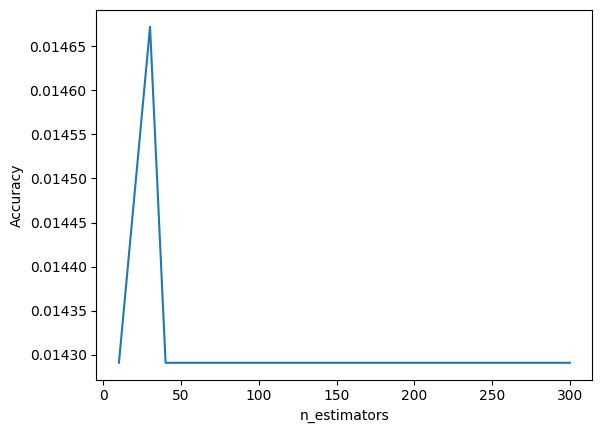

In [10]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

In [14]:
feature_cols = data.drop(['Price'], axis=1).columns

# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, len(feature_cols)+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
accuracy_scores = []

# Uso de un 10-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestClassifier(n_estimators=25, max_features=feature, random_state=1, n_jobs=-1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

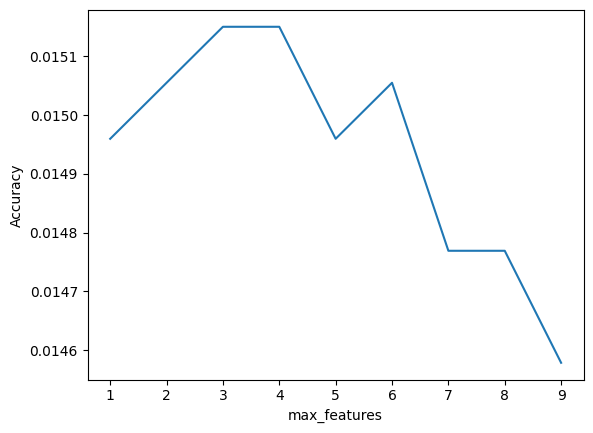

In [15]:
# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, accuracy_scores)
plt.xlabel('max_features')
plt.ylabel('Accuracy')

In [ ]:
clf = RandomForestClassifier(n_estimators=25, max_features=3, random_state=1, n_jobs=-1)
clf.fit(X, y)

,feature,importance
5,M_CamryL,0.000858
4,M_CamryBase,0.001018
3,M_Camry4dr,0.001840
7,M_CamrySE,0.002094
8,M_CamryXLE,0.002219
2,M_Camry,0.002409
6,M_CamryLE,0.002776
0,Year,0.043703
1,Mileage,0.943084


In [19]:
# Mejores Hiperparámetros:
#  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
# Desempeño del modelo RF calibrado:
# Mean Squared Error: 2411920.45
# R^2 Score: 0.842
# Mean Absolute Error (MAE): 1140.84
# Mean Absolute Percentage Error (MAPE): 8.33 %

#Encontrar los mejores hiperparametros: 

#Entrenar el modelo con los mejores hiperparámetros encontrados:

y_pred = clf.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE):", np.mean(np.abs((y_test - y_pred)/y_test))*100, "%")


Mean Squared Error: 61459.60825635104
R^2 Score: 0.9959820199736038
Mean Absolute Error (MAE): 22.172344110854503
Mean Absolute Percentage Error (MAPE): 0.14695308768372767 %


In [18]:
#Importancia de los predictores
#        Feature  Importance
# 0         Year    0.448241
# 1      Mileage    0.424250
# 3   M_Camry4dr    0.066602
# 7    M_CamrySE    0.022088
# 8   M_CamryXLE    0.019215
# 6    M_CamryLE    0.007427
# 2      M_Camry    0.006767
# 4  M_CamryBase    0.002741
# 5     M_CamryL    0.002669

pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
5,M_CamryL,0.000858
4,M_CamryBase,0.001018
3,M_Camry4dr,0.001840
7,M_CamrySE,0.002094
8,M_CamryXLE,0.002219
2,M_Camry,0.002409
6,M_CamryLE,0.002776
0,Year,0.043703
1,Mileage,0.943084


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [ ]:
#celda 3

# - Calibrar los parametros del modelo random forest es crucial para el desempeño del modelo.
# - Al ajustar estos parametros se entrenan en simultaneo mas de 100 modelos para poder obtener los mejores parametros posibles.
# - Es muy importante seleccionar bien los valores de los rangos, ya que dependiendo del tamaño de la base de datos puedes llegar a
# usar mucha memoria para poder entrenar en simulaneo los modelos.
# - En caso de ser necesario se tendra que limitar el numero de trabajos para que no se utilizen la totalidad de los nucleos del procesador.
# - Contar con un buen hardware te facilita mucho el entrenamiento y obtencion de parametros, el tiempo puede variar excesivamente 
# entre diferentes sistemas. 
